In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movies = pd.read_csv('C:/Users/Rohit Gupta/Downloads/IMDB_Movies (2).csv')

In [6]:
print(movies)

      color      director_name  num_critic_for_reviews  duration  \
0     Color      James Cameron                   723.0     178.0   
1     Color     Gore Verbinski                   302.0     169.0   
2     Color         Sam Mendes                   602.0     148.0   
3     Color  Christopher Nolan                   813.0     164.0   
4       NaN        Doug Walker                     NaN       NaN   
...     ...                ...                     ...       ...   
5038  Color        Scott Smith                     1.0      87.0   
5039  Color                NaN                    43.0      43.0   
5040  Color   Benjamin Roberds                    13.0      76.0   
5041  Color        Daniel Hsia                    14.0     100.0   
5042  Color           Jon Gunn                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0    

#### So, the given dataset consist of total 5043 rows and 28 columns.

### Getting a high-level understanding of the data

In [7]:
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [9]:
movies.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Data cleaning

## 1. Find out the number of null values in the dataset

### For column-wise null count

In [10]:
col_wise_null_count = movies.isnull().sum(axis=0).sort_values(ascending=False, inplace= False)

In [11]:
print(col_wise_null_count)

gross                        884
budget                       492
aspect_ratio                 329
content_rating               303
plot_keywords                153
title_year                   108
director_name                104
director_facebook_likes      104
num_critic_for_reviews        50
actor_3_name                  23
actor_3_facebook_likes        23
num_user_for_reviews          20
color                         19
duration                      15
language                      14
facenumber_in_poster          13
actor_2_name                  13
actor_2_facebook_likes        13
actor_1_name                   7
actor_1_facebook_likes         7
country                        5
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
movie_imdb_link                0
genres                         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64


### row-wise null count

In [12]:
row_wise_null_count = movies.isnull().sum(axis=1).sort_values(ascending=False, inplace=False)

In [13]:
print(row_wise_null_count)

279     15
4       13
2241    11
4945    11
2342    10
        ..
1703     0
1702     0
1701     0
1700     0
5042     0
Length: 5043, dtype: int64


### count the column-wise null percentage

In [14]:
col_wise_null_per = movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies)*100

In [15]:
print(col_wise_null_per)

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
content_rating                6.008328
plot_keywords                 3.033908
title_year                    2.141582
director_name                 2.062265
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_name                  0.456078
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.396589
color                         0.376760
duration                      0.297442
language                      0.277613
facenumber_in_poster          0.257783
actor_2_name                  0.257783
actor_2_facebook_likes        0.257783
actor_1_name                  0.138806
actor_1_facebook_likes        0.138806
country                       0.099147
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
movie_title                   0.000000
movie_imdb_link               0.000000
genres                   

## 2. Dropping columns which are not important for my analysis

In [16]:
movies = movies.drop(['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name','cast_total_facebook_likes','actor_3_name','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords'],axis=1)

In [17]:
print(movies)

          director_name  num_critic_for_reviews  duration        gross  \
0         James Cameron                   723.0     178.0  760505847.0   
1        Gore Verbinski                   302.0     169.0  309404152.0   
2            Sam Mendes                   602.0     148.0  200074175.0   
3     Christopher Nolan                   813.0     164.0  448130642.0   
4           Doug Walker                     NaN       NaN          NaN   
...                 ...                     ...       ...          ...   
5038        Scott Smith                     1.0      87.0          NaN   
5039                NaN                    43.0      43.0          NaN   
5040   Benjamin Roberds                    13.0      76.0          NaN   
5041        Daniel Hsia                    14.0     100.0      10443.0   
5042           Jon Gunn                    43.0      90.0      85222.0   

                               genres     actor_1_name  \
0     Action|Adventure|Fantasy|Sci-Fi      CCH Pounde

### Dropping unnecessary rows using the columns with high null percentage

In [18]:
col_wise_null_round_per = round(movies.isnull().sum(axis=0).sort_values(ascending=False)/len(movies)*100,2)

In [19]:
print(col_wise_null_round_per)

gross                     17.53
budget                     9.76
title_year                 2.14
director_name              2.06
num_critic_for_reviews     0.99
num_user_for_reviews       0.40
duration                   0.30
language                   0.28
actor_1_name               0.14
genres                     0.00
movie_title                0.00
num_voted_users            0.00
imdb_score                 0.00
movie_facebook_likes       0.00
dtype: float64


In [20]:
movies = movies[movies['gross'].notnull()]  # Filtering rows with non-null 'gross'
movies = movies[movies['budget'].notnull()]  # Filtering rows with non-null 'budget'

# Calculating the percentage of missing values
result = round(movies.isnull().sum().sort_values(ascending=False) / len(movies) * 100, 2)
print(result) 

language                  0.10
actor_1_name              0.08
num_critic_for_reviews    0.03
duration                  0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64


### Dropping the rows which are greater than five NaN values

In [21]:
# Filter rows with 5 or fewer missing values
movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]

C:\Users\Rohit Gupta\AppData\Local\Temp\ipykernel_14424\3628399244.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies = movies[movies.isnull().sum(axis=1).sort_values(ascending=False) <= 5]


In [22]:
print(movies)

          director_name  num_critic_for_reviews  duration        gross  \
0         James Cameron                   723.0     178.0  760505847.0   
1        Gore Verbinski                   302.0     169.0  309404152.0   
2            Sam Mendes                   602.0     148.0  200074175.0   
3     Christopher Nolan                   813.0     164.0  448130642.0   
5        Andrew Stanton                   462.0     132.0   73058679.0   
...                 ...                     ...       ...          ...   
5033      Shane Carruth                   143.0      77.0     424760.0   
5034   Neill Dela Llana                    35.0      80.0      70071.0   
5035   Robert Rodriguez                    56.0      81.0    2040920.0   
5037       Edward Burns                    14.0      95.0       4584.0   
5042           Jon Gunn                    43.0      90.0      85222.0   

                                   genres     actor_1_name  \
0         Action|Adventure|Fantasy|Sci-Fi      CC

In [23]:
# filling the missing NaN values
round(movies.isnull().sum().sort_values(ascending=False)/len(movies)*100,2)

language                  0.10
actor_1_name              0.08
num_critic_for_reviews    0.03
duration                  0.03
director_name             0.00
gross                     0.00
genres                    0.00
movie_title               0.00
num_voted_users           0.00
num_user_for_reviews      0.00
budget                    0.00
title_year                0.00
imdb_score                0.00
movie_facebook_likes      0.00
dtype: float64

In [25]:
# Calculating the count of each language given in the dataset
movies.groupby('language').language.count().sort_values(ascending=False)

language
English       3707
French          37
Spanish         26
Mandarin        15
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Dutch            3
Persian          3
Hebrew           3
Danish           3
Thai             3
Aboriginal       2
Indonesian       2
Dari             2
Arabic           1
Romanian         1
Vietnamese       1
Aramaic          1
Telugu           1
Swedish          1
Bosnian          1
Russian          1
Czech            1
Icelandic        1
Dzongkha         1
Mongolian        1
Maya             1
Filipino         1
Hungarian        1
Kazakh           1
Zulu             1
Name: language, dtype: int64

# Some questions with answers

# 1. Movies With Highest Profit

In [26]:
# We will change the unit of the budget and gross columns from $ to million $:
movies['budget']=movies['budget']/1000000
movies['gross']=movies['gross']/1000000

In [30]:
print(movies)

          director_name  num_critic_for_reviews  duration       gross  \
0         James Cameron                   723.0     178.0  760.505847   
1        Gore Verbinski                   302.0     169.0  309.404152   
2            Sam Mendes                   602.0     148.0  200.074175   
3     Christopher Nolan                   813.0     164.0  448.130642   
5        Andrew Stanton                   462.0     132.0   73.058679   
...                 ...                     ...       ...         ...   
5033      Shane Carruth                   143.0      77.0    0.424760   
5034   Neill Dela Llana                    35.0      80.0    0.070071   
5035   Robert Rodriguez                    56.0      81.0    2.040920   
5037       Edward Burns                    14.0      95.0    0.004584   
5042           Jon Gunn                    43.0      90.0    0.085222   

                                   genres     actor_1_name  \
0         Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   

In [32]:
# I created a new column named ‘profit’.
movies['profit']= movies['gross']- movies['budget']

In [33]:
print(movies)

          director_name  num_critic_for_reviews  duration       gross  \
0         James Cameron                   723.0     178.0  760.505847   
1        Gore Verbinski                   302.0     169.0  309.404152   
2            Sam Mendes                   602.0     148.0  200.074175   
3     Christopher Nolan                   813.0     164.0  448.130642   
5        Andrew Stanton                   462.0     132.0   73.058679   
...                 ...                     ...       ...         ...   
5033      Shane Carruth                   143.0      77.0    0.424760   
5034   Neill Dela Llana                    35.0      80.0    0.070071   
5035   Robert Rodriguez                    56.0      81.0    2.040920   
5037       Edward Burns                    14.0      95.0    0.004584   
5042           Jon Gunn                    43.0      90.0    0.085222   

                                   genres     actor_1_name  \
0         Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   

In [28]:
# After that I sorted it in Descending order
movies.sort_values(by='profit',ascending=False)

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.000000,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,124.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.000000,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,194.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.000000,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,125.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.000000,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,120.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.500000,1982.0,7.9,34000,424.449459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Katsuhiro Ôtomo,105.0,103.0,0.410388,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79,Japanese,2127.519898,2004.0,6.9,973,-2127.109510
2323,Hayao Miyazaki,174.0,134.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
3005,Lajos Koltai,73.0,134.0,0.195888,Drama|Romance|War,Marcell Nagy,Fateless,5603,45,Hungarian,2500.000000,2005.0,7.1,607,-2499.804112
3859,Chan-wook Park,202.0,112.0,0.211667,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131,Korean,4200.000000,2005.0,7.7,4000,-4199.788333


In [34]:
# And then I found out the top 10 movies that made the most profit:
top10 = movies.sort_values(by='profit',ascending=False).head(10)

In [35]:
top10.head(10)

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,124.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,194.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,125.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,120.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
794,Joss Whedon,703.0,173.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
17,Joss Whedon,703.0,173.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,73.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,136.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,152.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061


In [36]:
# After I found the top 10 profiting movies , I notice a duplicate value. So,it seems like the dataframe has duplicate values as well. 
# Hence I drop the duplicates and repeat the steps:
movies.drop_duplicates(keep='first',inplace=True)

In [37]:
print(movies)

          director_name  num_critic_for_reviews  duration       gross  \
0         James Cameron                   723.0     178.0  760.505847   
1        Gore Verbinski                   302.0     169.0  309.404152   
2            Sam Mendes                   602.0     148.0  200.074175   
3     Christopher Nolan                   813.0     164.0  448.130642   
5        Andrew Stanton                   462.0     132.0   73.058679   
...                 ...                     ...       ...         ...   
5033      Shane Carruth                   143.0      77.0    0.424760   
5034   Neill Dela Llana                    35.0      80.0    0.070071   
5035   Robert Rodriguez                    56.0      81.0    2.040920   
5037       Edward Burns                    14.0      95.0    0.004584   
5042           Jon Gunn                    43.0      90.0    0.085222   

                                   genres     actor_1_name  \
0         Action|Adventure|Fantasy|Sci-Fi      CCH Pounder   

In [38]:
# top 10 movies that made the most profit
top10 = movies.sort_values(by='profit',ascending=False).head(10)

In [39]:
top10.head(10)

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,178.0,760.505847,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.505847
29,Colin Trevorrow,644.0,124.0,652.177271,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.177271
26,James Cameron,315.0,194.0,658.672302,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.672302
3024,George Lucas,282.0,125.0,460.935665,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.935665
3080,Steven Spielberg,215.0,120.0,434.949459,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.449459
17,Joss Whedon,703.0,173.0,623.279547,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.279547
509,Roger Allers,186.0,73.0,422.783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.783777
240,George Lucas,320.0,136.0,474.544677,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.544677
66,Christopher Nolan,645.0,152.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.316061
439,Gary Ross,673.0,142.0,407.999255,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,329.999255


### 2.IMDb Top 250 movies

In [40]:
# I created a new dataframe named IMDb_Top_250 to show the top 250 movies with the highest IMDb Ratings.
IMDb_Top_250=movies[movies['num_voted_users']>25000].sort_values(by='imdb_score',ascending=False).head(250)

In [41]:
IMDb_Top_250.head(250)

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
1937,Frank Darabont,199.0,142.0,28.341469,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.00,1994.0,9.3,108000,3.341469
3466,Francis Ford Coppola,208.0,175.0,134.821952,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.00,1972.0,9.2,43000,128.821952
2837,Francis Ford Coppola,149.0,220.0,57.300000,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.00,1974.0,9.0,14000,44.300000
66,Christopher Nolan,645.0,152.0,533.316061,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.00,2008.0,9.0,37000,348.316061
4498,Sergio Leone,181.0,142.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.20,1966.0,8.9,20000,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,John Carney,232.0,85.0,9.437933,Drama|Music|Romance,Glen Hansard,Once,90827,329,English,0.18,2007.0,7.9,26000,9.257933
2605,Ang Lee,287.0,120.0,128.067808,Action|Drama|Romance,Chen Chang,"Crouching Tiger, Hidden Dragon",217740,1641,Mandarin,15.00,2000.0,7.9,0,113.067808
3029,David O. Russell,410.0,116.0,93.571803,Biography|Drama|Sport,Christian Bale,The Fighter,275869,389,English,25.00,2010.0,7.9,36000,68.571803
2177,Tim Burton,111.0,105.0,56.362352,Fantasy|Romance,Johnny Depp,Edward Scissorhands,357581,588,English,20.00,1990.0,7.9,16000,36.362352


In [42]:
# After that I found the Top250 movies not in the “English” language
IMDb_Top_250[IMDb_Top_250['language']!='English']

,director_name,num_critic_for_reviews,duration,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
4498,Sergio Leone,181.0,142.0,6.100000,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.200000,1966.0,8.9,20000,4.900000
4747,Akira Kurosawa,153.0,202.0,0.269061,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.000000,1954.0,8.7,11000,-1.730939
4029,Fernando Meirelles,214.0,135.0,7.563397,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.300000,2002.0,8.7,28000,4.263397
2373,Hayao Miyazaki,246.0,125.0,10.049886,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.000000,2001.0,8.6,28000,-8.950114
4259,Florian Henckel von Donnersmarck,215.0,137.0,11.284657,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.000000,2006.0,8.5,39000,9.284657
4921,Majid Majidi,46.0,89.0,0.925402,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.180000,1997.0,8.5,0,0.745402
2323,Hayao Miyazaki,174.0,134.0,2.298191,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570,Japanese,2400.000000,1997.0,8.4,11000,-2397.701809
2970,Wolfgang Petersen,96.0,293.0,11.433134,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426,German,14.000000,1981.0,8.4,11000,-2.566866
4105,Chan-wook Park,305.0,120.0,2.181290,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.000000,2003.0,8.4,43000,-0.818710
4659,Asghar Farhadi,354.0,123.0,7.098492,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,0.500000,2011.0,8.4,48000,6.598492


### 3. List of the best directors with the highest IMDB ratings

In [43]:
top10director=movies.groupby('director_name').imdb_score.mean().sort_values(ascending=False).head(10)

In [44]:
top10director.head(10)

director_name
Charles Chaplin          8.600000
Tony Kaye                8.600000
Alfred Hitchcock         8.500000
Ron Fricke               8.500000
Damien Chazelle          8.500000
Majid Majidi             8.500000
Sergio Leone             8.433333
Christopher Nolan        8.425000
S.S. Rajamouli           8.400000
Marius A. Markevicius    8.400000
Name: imdb_score, dtype: float64

### 4. Most popular Genre 

In [45]:
# 1: Drop rows with missing genres
movies = movies.dropna(subset=['genres'])

In [46]:
genre_counts = movies['genres'].value_counts().sort_values(ascending=False)
most_popular_genre = genre_counts.index[0]
count = genre_counts.iloc[0]

print(f"Most popular genre (by frequency): {most_popular_genre} (appears {count} times)")

Most popular genre (by frequency): Drama (appears 153 times)


### 5. List of Critic-favorite and audience-favorite actors

In [48]:
# There are a lot of actors in the list, bit I chose 3 actors among them to check their ratings:
Meryl_Streep = movies[movies['actor_1_name']=='Meryl Streep']
Leo_Caprio = movies[movies['actor_1_name']=='Leonardo DiCaprio']
Brad_Pitt = movies[movies['actor_1_name']=='Brad Pitt']

In [49]:
combined_data = pd.concat([Meryl_Streep, Leo_Caprio, Brad_Pitt], ignore_index=True)

In [50]:
print(combined_data)

            director_name  num_critic_for_reviews  duration       gross  \
0            Nancy Meyers                   187.0     120.0  112.703470   
1           Curtis Hanson                    42.0     111.0   46.815748   
2             Nora Ephron                   252.0     123.0   94.125426   
3           David Frankel                   208.0     109.0  124.732962   
4          Robert Redford                   227.0      92.0   14.998070   
5          Sydney Pollack                    66.0     161.0   87.100000   
6           David Frankel                   234.0     100.0   63.536011   
7           Carl Franklin                    64.0     127.0   23.209440   
8          Stephen Daldry                   174.0     114.0   41.597830   
9          Phyllida Lloyd                   331.0     105.0   29.959436   
10          Robert Altman                   211.0     105.0   20.338609   
11          James Cameron                   315.0     194.0  658.672302   
12           Baz Luhrmann

In [51]:
combined_data.dtypes

director_name              object
num_critic_for_reviews    float64
duration                  float64
gross                     float64
genres                     object
actor_1_name               object
movie_title                object
num_voted_users             int64
num_user_for_reviews       object
language                   object
budget                    float64
title_year                float64
imdb_score                float64
movie_facebook_likes        int64
profit                    float64
dtype: object

In [52]:
combined_data['num_critic_for_reviews'] = pd.to_numeric(combined_data['num_critic_for_reviews'])
combined_data['num_user_for_reviews'] = pd.to_numeric(combined_data['num_user_for_reviews'])

In [53]:
# the 3 actors with their average number of user reviews and critic reviews
combined_data.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,330.190476,914.476190
Meryl Streep,181.454545,297.181818


In [54]:
actors_with_highest_reviews = combined_data.groupby('actor_1_name')[['num_critic_for_reviews','num_user_for_reviews']].mean()

#### Actors with average number of critic reviews and number of user reviews

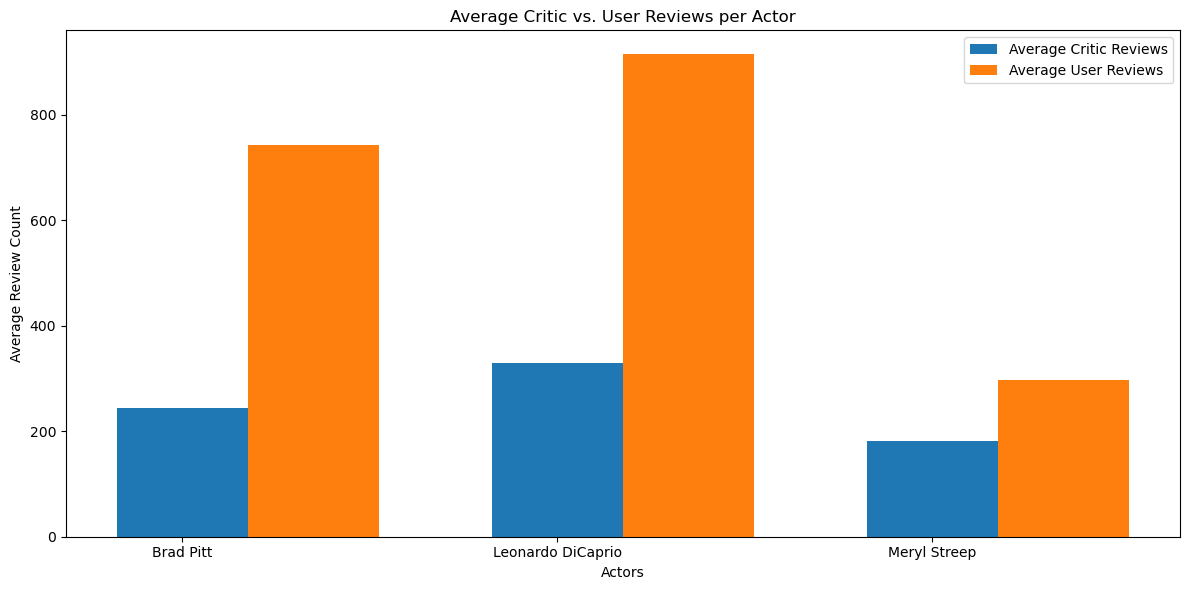

In [55]:
average_critic_reviews = actors_with_highest_reviews['num_critic_for_reviews']
average_user_reviews = actors_with_highest_reviews['num_user_for_reviews']
actor_names = actors_with_highest_reviews.index.tolist() 

plt.figure(figsize=(12, 6))
bar_width = 0.35 
index = range(len(actor_names))
plt.bar(actors_with_highest_reviews.index, average_critic_reviews, bar_width, label='Average Critic Reviews')
plt.bar([i + bar_width for i in index], average_user_reviews, bar_width, label='Average User Reviews')

plt.xlabel('Actors')
plt.ylabel('Average Review Count')
plt.title('Average Critic vs. User Reviews per Actor')


if len(actor_names) > 10:
    plt.xticks(index, actor_names, rotation=45, ha='right') 
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

#### From the chart plotted above, it is clear that Leonardo DiCaprio is the actor who has the highest average number of user reviews and critic reviews.

In [57]:
# After ther I calculated the decades:
movies['decade']=movies['title_year'].apply(lambda x: (x//10) *10).astype(np.int64) 
movies['decade']=movies['decade'].astype(str)+'s' 
movies=movies.sort_values(['decade'])

In [52]:
print(movies)

          director_name  num_critic_for_reviews  duration       gross  \
4812     Harry Beaumont                    36.0     100.0    2.808000   
4958  Harry F. Millarde                     1.0     110.0    3.000000   
2734         Fritz Lang                   260.0     145.0    0.026435   
4157     Victor Fleming                   213.0     102.0   22.202612   
4706      Mark Sandrich                    66.0      81.0    3.000000   
...                 ...                     ...       ...         ...   
3470  Steven Soderbergh                   324.0     110.0  113.709992   
781     Martin Campbell                   258.0     117.0   43.290977   
2495     Malcolm D. Lee                    56.0     123.0   70.492685   
1668  Steven Soderbergh                   450.0     106.0   32.154410   
3264     Michael Haneke                   447.0     127.0    0.225377   

                                genres       actor_1_name  \
4812                   Musical|Romance         Anita Page   
4

In [59]:
# Then I created the data frame df_by_decade:
df_by_decade=movies.groupby('decade')
df_by_decade['num_voted_users'].sum()
df_by_decade=pd.DataFrame(df_by_decade['num_voted_users'].sum())

In [60]:
print(df_by_decade)

        num_voted_users
decade                 
1920s            116392
1930s            804839
1940s            230838
1950s            678336
1960s           2983442
1970s           8524102
1980s          19987476
1990s          69735679
2000s         170908676
2010s         120640994


### Graphical Representation of number of voted users vs decade

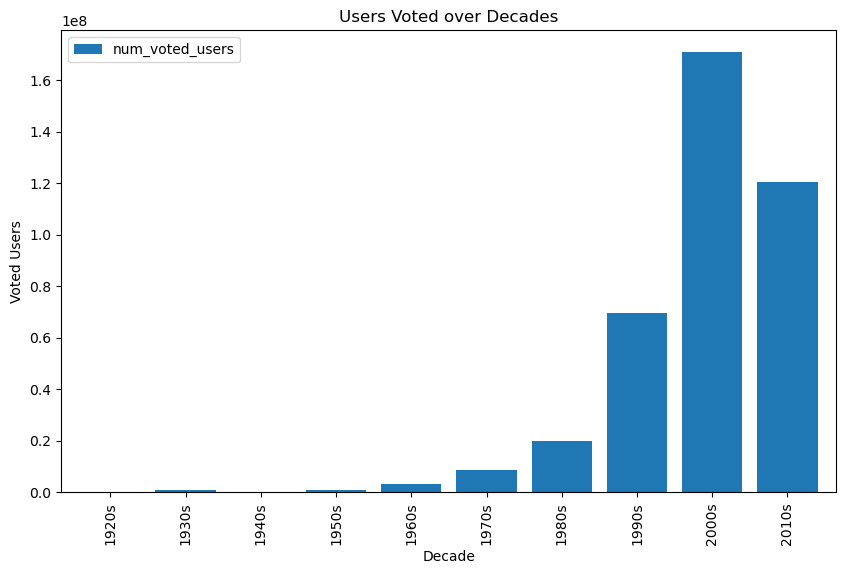

In [61]:
# Now I plotted the bar graph
df_by_decade.plot.bar(figsize=(10,6),width=0.8) 
plt.xlabel("Decade")
plt.ylabel("Voted Users")
plt.title("Users Voted over Decades")
# plt.yscale('log') 
plt.show()

#### It can be seen that overall number of users are increasing over the decade.

### Graphical Representation of movies genres and IMDB scores

In [63]:
print(movies.columns)

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'profit', 'decade'],
      dtype='object')


In [64]:
# Group movies by genres and calculate average IMDb score
IMDB_avg_scores = movies.groupby('genres')['imdb_score'].mean().sort_values(ascending=False).head(20)

In [65]:
print(IMDB_avg_scores)

genres
Crime|Drama|Fantasy|Mystery                        8.50
Adventure|Animation|Drama|Family|Musical           8.50
Action|Adventure|Drama|Fantasy|War                 8.40
Adventure|Animation|Fantasy                        8.40
Adventure|Drama|Thriller|War                       8.40
Biography|Drama|History|Music                      8.30
Documentary|War                                    8.30
Documentary|Drama|Sport                            8.30
Adventure|Animation|Comedy|Drama|Family|Fantasy    8.30
Adventure|Drama|War                                8.25
Drama|Mystery|War                                  8.20
Biography|Crime|Documentary|History                8.20
Drama|Fantasy|War                                  8.20
Adventure|Drama|Thriller|Western                   8.10
Action|Animation|Sci-Fi                            8.10
Adventure|Comedy|Crime|Drama                       8.10
Biography|Crime|Drama|History                      8.10
Biography|Crime|Drama|Western            

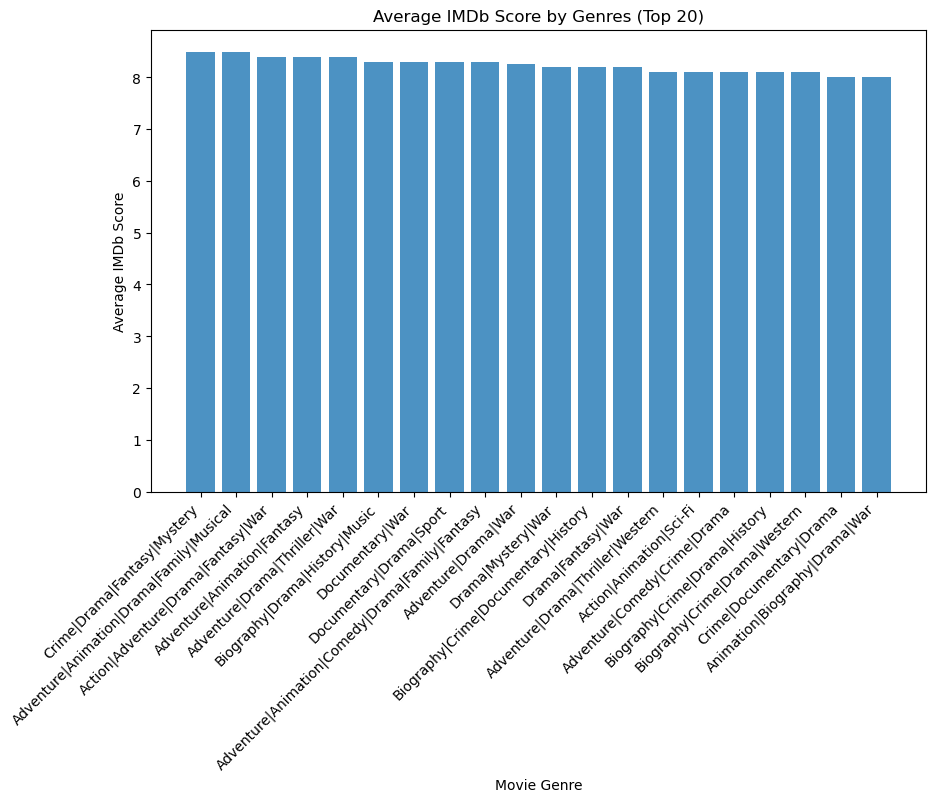

In [66]:
# Creating a bar chart
plt.figure(figsize=(10, 6))
#IMDB_avg_scores.plot.bar(figsize=(15,6),width=0.8) 
plt.bar(IMDB_avg_scores.index, IMDB_avg_scores.values, alpha=0.8)

# Adding labels and title
plt.xlabel('Movie Genre')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Genres (Top 20)')

# Rotating x-axis labels for readability as there are many genres
plt.xticks(rotation=45, ha='right')
# plt.yscale('log') 

# Show the plot
# plt.tight_layout()
plt.show()

#### Based on the dataset provided,it has been found that IMDB ratings for each movie with popular genre is not high which means that high IMDB ratings of a movie doesn’t depend on the movie belonging to the category of popular genres..

### Graphical Representation of movie durations and IMDB scores

In [60]:
print(movies.columns)

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'profit', 'decade'],
      dtype='object')


In [68]:
top_20_movies = movies.sort_values(by='duration', ascending=False).head(20)

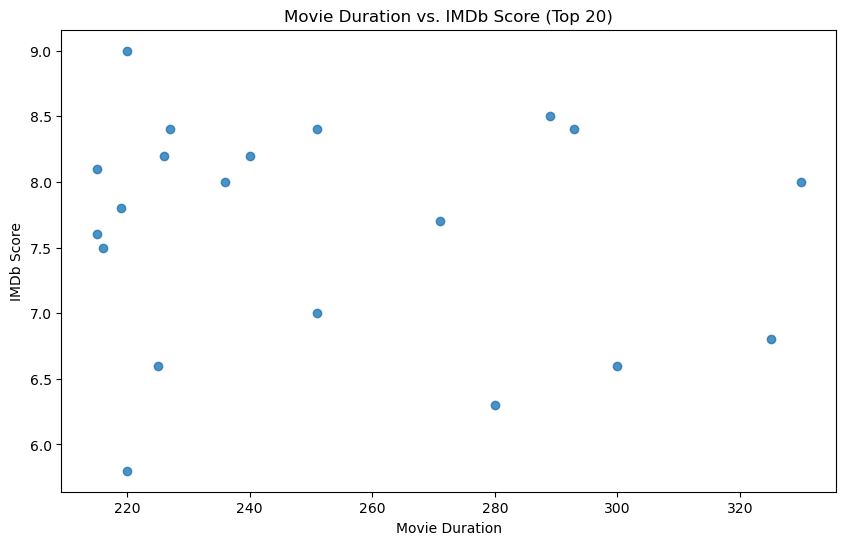

In [69]:
plt.figure(figsize=(10, 6))
plt.scatter(top_20_movies['duration'], top_20_movies['imdb_score'], alpha=0.8)

plt.xlabel('Movie Duration')
plt.ylabel('IMDb Score')
plt.title('Movie Duration vs. IMDb Score (Top 20)')

plt.show()


#### From the scatterplot plotted between movie duration and IMDB scores for top 20 movie durations, it has been observed that even for the movies with highest duration, the IMDB score is not the highest. So, this shows that IMBD ratings doesn’t depend on the durations of a movie.

In [70]:
popular_lang_count = movies.groupby('language').language.count().sort_values(ascending=False).head(20)

In [71]:
print(popular_lang_count)

language
English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Korean           5
Portuguese       5
Norwegian        4
Dutch            3
Persian          3
Hebrew           3
Danish           3
Thai             3
Aboriginal       2
Indonesian       2
Dari             2
Name: language, dtype: int64


#### English is the most preferred language for the movies. 

### Graphical Representation of language of movies and IMDB scores

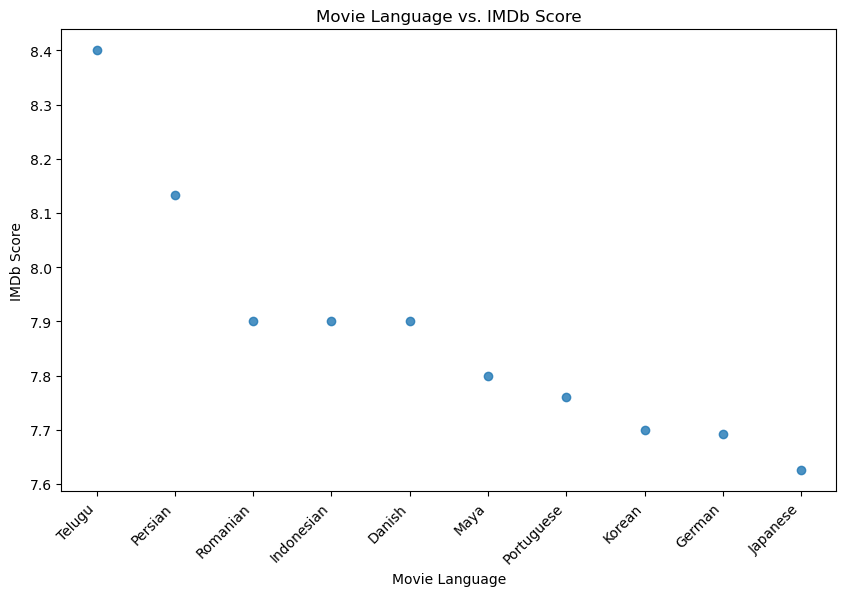

In [72]:
lang_avg_scores = movies.groupby('language')['imdb_score'].mean().sort_values(ascending=False).head(10) 

plt.figure(figsize=(10, 6))
plt.scatter(lang_avg_scores.index, lang_avg_scores.values, alpha=0.8)

plt.xlabel('Movie Language')
plt.ylabel('IMDb Score')
plt.title('Movie Language vs. IMDb Score')

plt.xticks(rotation=45, ha='right')

plt.show()

#### From the above scatterplot plotted between language and IMDB scores of different movies, it is clear that IMDB rating of a movie is not dependent on the language of the movie.

### Graphical Representation of directors and IMDB scores

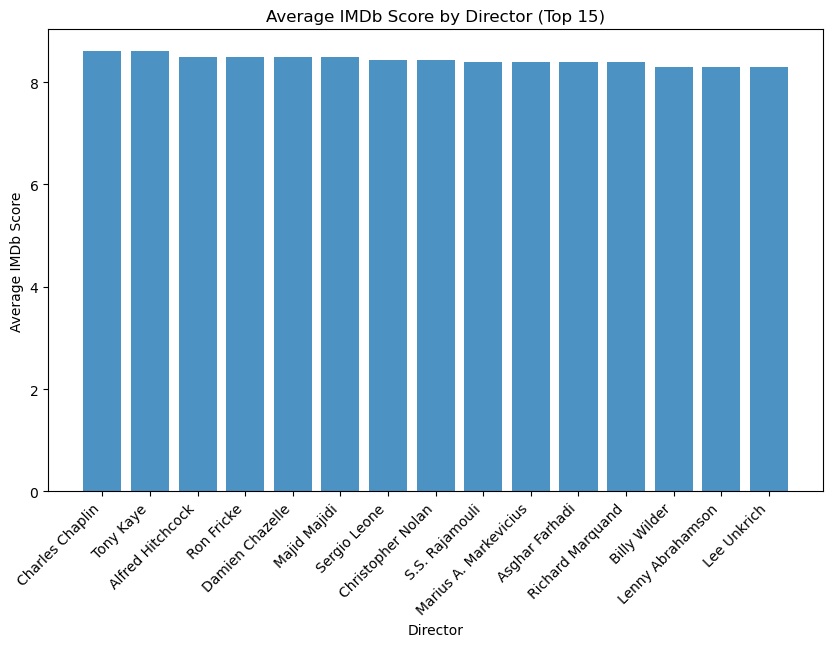

In [103]:
director_avg_imdb_scores = movies.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(15) 

plt.figure(figsize=(10, 6))
plt.bar(director_avg_imdb_scores.index, director_avg_imdb_scores.values,alpha=0.8)

plt.xlabel('Director')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Director (Top 15)')

plt.xticks(rotation=45, ha='right')

plt.show()

In [207]:
avg_imdb_score = movies['imdb_score'].mean()
print(avg_imdb_score)

6.4639004149377595


#### As the overall average of IMDB score is 6.46, but the average IMDB score for the popular director is 8.7. So, its clear that IMDB ratings of a movie do not depend upon the popularity of the director of the movie.

### Graphical Representation of relationship between movie budgets and the imdb scores

In [90]:
print(movies.columns)

Index(['director_name', 'num_critic_for_reviews', 'duration', 'gross',
       'genres', 'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'budget', 'title_year',
       'imdb_score', 'movie_facebook_likes', 'profit', 'decade'],
      dtype='object')


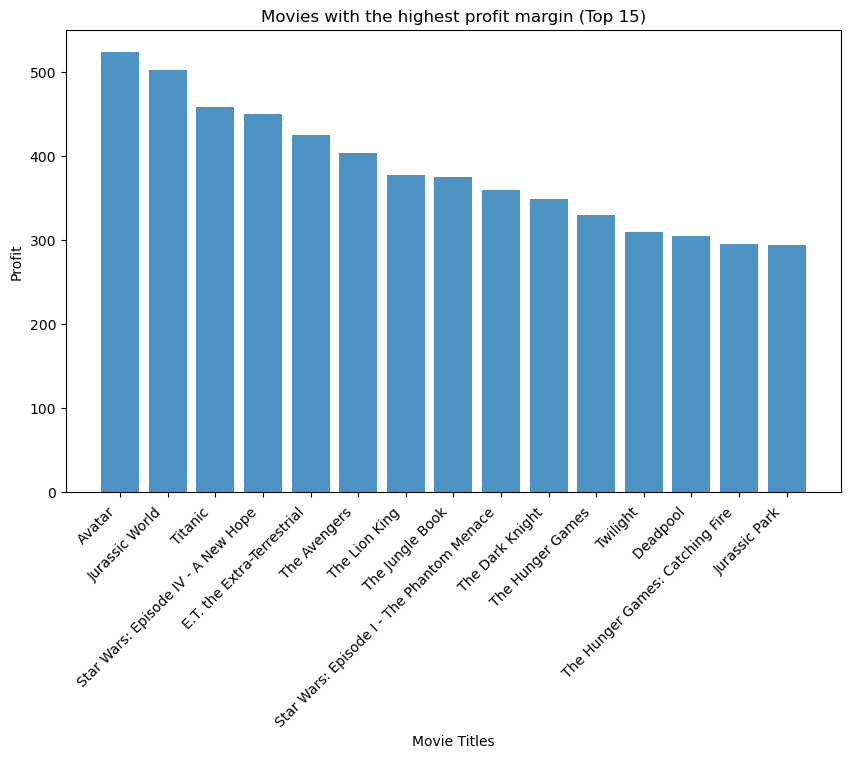

In [73]:
imdb_avg_scores = movies.groupby('movie_title')['profit'].sum().sort_values(ascending=False).head(15) 

plt.figure(figsize=(10, 6))
plt.bar(imdb_avg_scores.index, imdb_avg_scores.values,alpha=0.8)

plt.xlabel('Movie Titles')
plt.ylabel('Profit')
plt.title('Movies with the highest profit margin (Top 15)')

plt.xticks(rotation=45, ha='right')

plt.show()

#### From the above chart, it is clear that Avatar is the movie with highest profit margin.